## GloVE
---
#### 기존 방법론에 대한 비판
- LSA(Latest Semantic Analysis)의 단점
    - 카운트 기반으로 코퍼스 전체적인 통계 정보를 고려하지만, 유추 성능에서는 떨어짐
- Word2Vec 단점
    - LSA보다는 유추 기능이 뛰어나지만 윈도우 기반으로 학습하다 보니 윈도우 밖의 전체 문장의 정보를 반영하지 못함

#### Glove(Global Vectors for Word Representation)
- 임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는 것
- 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matarix)
    - 행과 열을 전체 단어 집합의 단어들로 구성하고, i 단어의 윈도우 크기 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬
    
카운트|I|like|enjoy|deep|learning|NLP|flying
-|-|-|-|-|-|-|-|
I|0|2|1|0|0|0|0
like|2|0|0|1|0|1|0
enjoy|1|0|0|0|0|0|1
deep|0|1|0|0|1|0|0
learning|0|0|0|1|0|0|0
NLP|0|1|0|0|0|0|0
flying|0|0|1|0|0|0|0


- 동시 등장 확률(Co-occurence Probability)
    - 동시 등장 확률($P(k|i)$: i=중심단어, k=주변단어): 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산하는 조건부 확률
    - i의 행의 모든 값을 더한 값을 분모, i행 k열의 값을 분자

동시 등장 확률과 크기 관계 비(ratio)|k=solid|k=gas|k=water|k=fasion
-|-|-|-|-
P(k l ice)|큰 값|작은 값|큰 값|작은 값
P(k l steam)|작은 값|큰 값|큰 |	작은 값
P(k l ice) / P(k l steam)|큰 값|작은 값|1에 가까움|1에 가까움

- 손실 함수
    - $X$: 동시 등장 행렬
    - $X_{ij}$: 중심 단어 i가 등장했을 때ㅐ 윈도우 내 주변 단어 j가 등장하는 횟수
    - $X_i$: $\sum_{j}{X_{ij}}$: 동시 등장 행렬에서 i행의 값을 모두 더한 값
    - $P_{ik}$: $P(k|i) = \frac{X_{ik}}{x_i}$: 중심 단어 i가 등장했을 때 윈도우 내 주변 단어 k가 등장할 확률
    - $\frac{P_{ik}}{P_{jk}}$: $P_{ik}$를 $P_{jk}$로 나눠준 값
    - $w_i$: 중심 단어 i의 임베딩 벡터
    - $\tilde{w_k}$: 주변 단어 k의 임베딩 벡터
    - $dot product(w_i, \tilde{w_k}) \approx \log{P(k|i)} = \\log(P_{ik})$
    1. $F(w_i, w_j, \tilde{w_k}) = \displaystyle\frac{P_{ik}}{P_{jk}}$
        - 초기 식
    2. $F(w_i - w_j, \tilde{w_k}) = \displaystyle\frac{P_{ik}}{P_{jk}}$
        - $w_i$와 $w_j$의 관계 비를 인코딩하는 것이 목적이기 때문에 $w_i$와 $w_j$의 차를 입력으로 사용 제안
    3. $F((w_i - w_j)^T\tilde{w_k}) = \displaystyle\frac{P_{ik}}{P_{jk}}$
        - 우변의 값이 스칼라이기 때문에 좌변을 스칼라로 만들어주기 위해 내적 수행
    4. $\displaystyle\frac{P_{ik}}{P_{jk}} = \displaystyle\frac{F({w_i}^T\tilde{w_k})}{F({w_j}^T\tilde{w_k})} \rightarrow F((w_i - w_j)^T\tilde{w_k}) = \displaystyle\frac{F({w_i}^T\tilde{w_k})}{F({w_j}^T\tilde{w_k})} \rightarrow F({w_i}\tilde{w_k} - w_j^T\tilde{w_k}) = \displaystyle\frac{F({w_i}^T\tilde{w_k})}{F({w_j}^T\tilde{w_k})}$
        - 중심 단어와 주변 단어 선택 기준은 실제로 무작위이기 때문에 이 둘의 관계가 자유로워야 함 $\rightarrow$ 준동형 $F(a+b) = F(a)F(b)$ 형태로 변형 작업
    5. $exp({w_i}\tilde{w_k} - w_j^T\tilde{w_k}) = \displaystyle\frac{exp({w_i}^T\tilde{w_k})}{exp({w_j}^T\tilde{w_k})}$

        $exp({w_i}\tilde{w_k}) = P_{ik} = \displaystyle\frac{X_{ik}}{x_i}$

        ${w_i}^T\tilde{w_k} = \log{P_{ik}} = \log{(\displaystyle\frac{X_{ik}}{X_i})} = \log{X_{ik}} - \log{X_i}$
        - 함수 F를 지수함수로 제안
    
    6. ${w_i}^T\tilde{w_k} + b_i + \tilde{b_k} = \log{X_{ik}}$
        - $\log{X_{ik}}$는 i와 k가 바뀌어도 같기때문에 자유로운데 $\log{X_i}$가 걸림 $\rightarrow \log{X_i}$항을 $w_i, \tilde{w_k}$의 편항 $b_i, \tilde{b_k}$로 대체 

    7. $Loss function = \displaystyle\sum_{m,n=1}^{V}{{({w_m}^T\tilde{w_n} + b_n + \tilde{b_n} - \log{X_{mn}})}^2}$
        - 손실 함수(V는 단어 집합)
        - $\log{X_{ik}}$에서 $X_{ik}$가 0이 될 수 있음 $\rightarrow$ $\log{(1+X_{ik})}$로 변경
        - 등장행렬X가 DTM과 같은 희소 행렬일 가능성이 다분(많은 값이 0이거나 매우 작은 값일 경우가 많음) $\rightarrow$ $X_{ik}$의 값(단어 등장 확률)에 영향을 받는 가중치 함수 $f(X_{ik})$ 손실함수 도입
        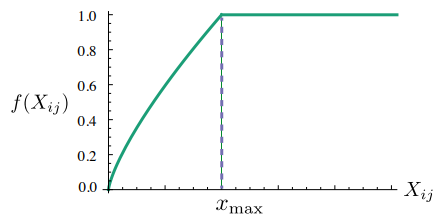
        - $X_{ik}$의 값이 작으면 상대적으로 함수의 값을 작도록하고 it,is와 같은 값이 클 경우에는 최대값을 정해놓음
    8. $f(x) = min(1, {(x/x_{max})}^{3/4})$ 도입 $\rightarrow$ 
        $최종 Loss function = f(X_{mn})\displaystyle\sum_{m,n=1}^{V}{{({w_m}^T\tilde{w_n} + b_n + \tilde{b_n} - \log{X_{mn}})}^2}$ 


## 패스트텍스트(FastText)
- 각 단어를 글자 단위 n-gram의 구성으로 취급
- ex) n=3 apple, '\<apple>', '<ap', 'app', 'ppl', 'ple', 'le>' 총 6개의 토큰을 벡터화
#### 모르는 단어(Out of Vocabulary, OOV)에 대한 대응
- 훈련된 단어 이외의 단어와도 유사도 계산 가능
- ex) birthplace(출생지)가 학습되있지 않아도 birth와 place가 학습되어 있다면 birthplace의 벡터를 얻을 수 있음
#### 단어 집합 내 빈도 수가 적었던 단어에 대한 반응
- 오타와 같은 노이즈 데이터에도 강점이 있음
